In [40]:
from dataWrangler import *
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob 
import os

In [48]:
# loading raw csv files from local dirctory of all makes and models. 
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [49]:
#choosing two vehicles to compare 
vehicle1='chevrolet tahoe'
vehicle2='chevrolet suburban'
#calling the compare function
result=compare_2vehicles(vehicle1,vehicle2,frame)

In [50]:
result=result.iloc[::-1]
result=result.rolling(3).mean()
result.dropna(inplace=True)

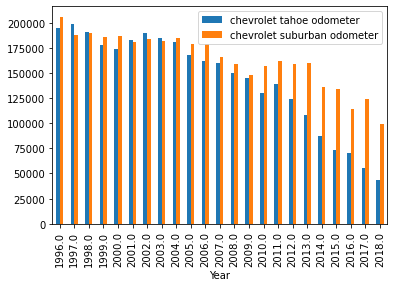

In [52]:
# life time and reliablilty test
_=result.plot(kind='bar',x='Year',y=[result.columns[2],result.columns[-2]])

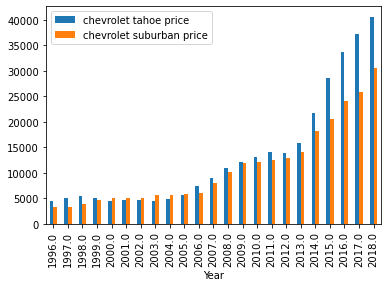

In [53]:
_=result.plot(kind='bar',x='Year',y=[result.columns[3],result.columns[-1]])

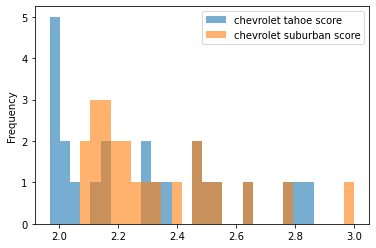

In [54]:
#robustness test
_=result.plot(x='Year',y=[result.columns[1],result.columns[-3]]
            ,alpha=0.6,bins=30,kind='hist')